Action
3
Observation
(210, 160, 3)


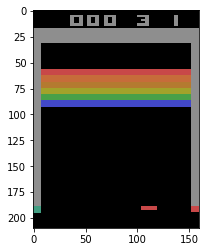

In [5]:
import gym
env = gym.make('Breakout-v0')
env.reset()
for _ in range(100):
    plt.imshow(env.render(mode='rgb_array'))
#     display.display(plt.gcf())
#     display.clear_output(wait=False)
    action = env.action_space.sample()
    env.step(action)
print("Action")
print(env.action_space.sample())
print("Observation")
print(observation.shape)




In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from keras import backend as K
from keras.datasets import cifar10
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_X,train_Y), (test_X,test_Y) = cifar10.load_data()


train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
 
ht = 32
wd = 32
ww = 160
hh = 210
cc = 3
color = (255,255,255)
result_train_X = np.full((50000, hh,ww,cc), color, dtype = train_X.dtype)


# compute center offset
xx = (ww - wd) // 2
yy = (hh - ht) // 2

# copy img image into center of result image
for i in range(train_X.shape[0]):
    result_train_X[i, yy:yy+ht, xx:xx+wd] = train_X[i]
    
print(result_train_X.shape)


# K.image_data_format('th')


(50000, 210, 160, 3)


In [3]:
state_dim = [32, 32, 3]
num_actions=10
learning_rate = 0.01
epochs = 20
batch_size = 32
model = Sequential()
#         model.add(layers.Input(shape=(state_dim[0], state_dim[1], state_dim[2])))
model.add(layers.Conv2D(filters = 32, kernel_size = 8, strides = 4, activation="relu", input_shape = (210,160,3)))
model.add(layers.MaxPooling2D(pool_size = (2,2), padding='same'))
model.add(layers.Conv2D(filters = 64, kernel_size = 4, strides = 3, activation="relu"))
model.add(layers.MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(layers.Conv2D(filters = 64, kernel_size = 3, strides = 1, activation="relu"))
model.add(layers.MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(num_actions, activation='linear'))

model.compile(loss = 'mean_squared_error', optimizer=Adam(lr=learning_rate, epsilon=1e-7))
model.summary()

model.fit(result_train_X, train_Y_one_hot, batch_size=batch_size,epochs=epochs,verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 51, 39, 32)        6176      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 20, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 6, 64)          32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 3, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 1, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

KeyboardInterrupt: 

In [20]:
import pickle
import os
class Buffer:
    def __init__(self, loadBool):
        self.b = [] 
        if loadBool:
            
    def load(self):
        try:
            path = os.path.join( "test.txt")
            with open("test.txt", "rb") as fp:   # Unpickling
                self.b = pickle.load(fp)

            print("Replay Buffer loaded : " + str(len(self.b)))
            
        except EOFError:
            self.b = []
            print("Replay Buffer Load file empty") 
            
    def save(self):
        with open("test.txt", "wb") as fp:   #Pickling
            pickle.dump(self.b, fp)
        print("Buffer saved")
l = [1,2,3,4, 5]
# with open("test.txt", "wb") as fp:   #Pickling
#     pickle.dump(l, fp)
    
# l = None
# with open("test.txt", "rb") as fp:   # Unpickling
#     l = pickle.load(fp)
buffer = Buffer()
print(len(buffer.b))
buffer.b = l
buffer.save()
buffer.load()
print(buffer.b)



0
Buffer saved
Replay Buffer loaded : 5
[1, 2, 3, 4, 5]


In [1]:
import gym
env = gym.make('CarRacing-v0')
env.reset()
for _ in range(100):
    env.render()
    observation, reward, done, info = env.step(env.action_space.sample()) # take a random action
print("Action")
print(env.action_space.sample())
print("Observation")
print(observation.shape)

C:\Users\Kirat\Anaconda3\envs\TensorGPU, Keras\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Track generation: 1114..1397 -> 283-tiles track
Action
[0.32663214 0.8115699  0.2914864 ]
Observation
(96, 96, 3)


In [13]:
print("Action")
print(env.action_space.sample())

Action
3


In [5]:
import numpy as np
a = np.array([[1, 255,103 ],[4,5,6]])
a = np.concatenate(a)
a = np.array(a)
print(a.dtype)

int32


In [45]:
num_actions = 3
action_space = np.array([i for i in range(num_actions)])
action_space = action_space.astype('float32')
action = random.choice(action_space)
print(action)

2.0


In [46]:
str1 = 'model'
str2 = str(str1) +".json"
print(str2)

model.json


In [10]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [11]:
tf.debugging.set_log_device_placement(True)

# Create some tensors
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [12]:
tf.debugging.set_log_device_placement(True)
# Place tensors on the CPU
with tf.device('/CPU:0'):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
    
# Run on the GPU
c = tf.matmul(a, b)

print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

NAME = "Cats-vs-dogs-CNN"

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

model.fit(X, y,
          batch_size=32,
          epochs=3,
          validation_split=0.3)

FileNotFoundError: [Errno 2] No such file or directory: 'X.pickle'

In [8]:
import numpy as np
a = np.zeros((2,10) )
b = np.ones((2,3))
c = np.append(a, b, axis=1)
print(c)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [9]:
import os

In [ ]:
if not os.path.exists("results/sum_reward_CNN-32-64-64-512-1628468973"):
        
    np.save("results/sum_reward_{}".format(model_save_name), agent_sum_reward)
else:
        
    a = np.load("results/sum_reward_{}".format(model_load_name))